### Note: Use this as template ML coding to implement ConvLSTM on the LURA 21-22 Project

# Next-Frame Video Prediction with Convolutional LSTMs

Author: Amogh Joshi
Date created: 2021/06/02
Last modified: 2021/06/05

Description: How to build and train a convolutional LSTM model for next-frame video prediction.

URL: https://keras.io/examples/vision/conv_lstm/

View in Colab: https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/conv_lstm.ipynb

GitHub: https://github.com/keras-team/keras-io/blob/master/examples/vision/conv_lstm.py

Moving MNIST data: http://www.cs.toronto.edu/~nitish/unsupervised_video/


## Introduction

The Convolutional LSTM architectures bring together time series processing and computer vision by introducing a convolutional recurrent cell in a LSTM layer. In this example, we will explore the Convolutional LSTM model in an application to next-frame prediction, the process of predicting what video frames come next given a series of past frames.


## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

## Dataset Construction

The MNIST dataset used here is already in the correct and clean form. An example on how to create such "moving" MNIST dataset is shown in this source: https://gist.github.com/praateekmahajan/b42ef0d295f528c986e2b3a0b31ec1fe.


For this example, we will be using the readily available Moving MNIST dataset (http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy).

We will download the dataset and then construct and preprocess training and validation sets.

For next-frame prediction, our model will be using a previous frame, which we'll call f_n, to predict a new frame, called f_(n + 1). To allow the model to create these predictions, we'll need to process the data such that we have "shifted" inputs and outputs, where the input data is frame x_n, being used to predict frame y_(n + 1).

In [2]:
files_path = '/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Clean_Works/v4_Next-Frame Prediction with Convolutional LSTMs/PNG'

In [46]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area1/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area1.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area1=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [47]:
print(dataset_area1.shape)

(46, 100, 109, 3)


In [48]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area2/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area2.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area2=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [49]:
print(dataset_area2.shape)

(46, 100, 109, 3)


In [50]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area3/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area3.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area3=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [51]:
print(dataset_area3.shape)

(46, 100, 109, 3)


In [52]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area4/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area4.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area4=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [53]:
print(dataset_area4.shape)

(46, 100, 109, 3)


In [54]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area5/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area5.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area5=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [55]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area6/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area6.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area6=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [56]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area7/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area7.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area7=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [57]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area8/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area8.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area8=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [58]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area9/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area9.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area9=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [59]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area10/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area10.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area10=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [60]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area11/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area11.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area11=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [61]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area12/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area12.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area12=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [62]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area13/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area13.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area13=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [63]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area14/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area14.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area14=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [64]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area15/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area15.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area15=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [65]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area16/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area16.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area16=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [66]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area17/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area17.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area17=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [67]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area18/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area18.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area18=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [68]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area19/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area19.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area19=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [69]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area20/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area20.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area20=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [70]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area21/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area21.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area21=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [71]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area22/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area22.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area22=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [72]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area23/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area23.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area23=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [73]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area24/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area24.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area24=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [74]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area25/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area25.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area25=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [75]:
times = dataset_area1.shape[0]
print('Times: '+ str(times))

frames_width = dataset_area1.shape[1]
print('Frame width: '+ str(frames_width))

frames_height = dataset_area1.shape[2]
print('Frame width: '+ str(frames_height))

channels = dataset_area1.shape[3]
print('channels: '+ str(channels))

Times: 46
Frame width: 100
Frame width: 109
channels: 3


In [79]:
#dataset_area1 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area1.npy')
#dataset_area2 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area2.npy')
#dataset_area3 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area3.npy')
#dataset_area4 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area4.npy')
#dataset_area5 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area5.npy')



dataset_area1 = dataset_area1.reshape((times, frames_width, frames_height, channels))
dataset_area2 = dataset_area2.reshape((times, frames_width, frames_height, channels))
dataset_area3 = dataset_area3.reshape((times, frames_width, frames_height, channels))
dataset_area4 = dataset_area4.reshape((times, frames_width, frames_height, channels))
dataset_area5 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area6 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area7 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area8 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area9 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area10 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area11 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area12 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area13 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area14 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area15 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area16 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area17 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area18 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area19 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area20 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area21 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area22 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area23 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area24 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area25 = dataset_area5.reshape((times, frames_width, frames_height, channels))


moving = np.atleast_1d([dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area11,dataset_area12,dataset_area13,dataset_area14,dataset_area15,
                        dataset_area16,dataset_area17,dataset_area18,dataset_area19,dataset_area20,
                        dataset_area21,dataset_area22,dataset_area23,dataset_area24,dataset_area25,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area11,dataset_area12,dataset_area13,dataset_area14,dataset_area15,
                        dataset_area16,dataset_area17,dataset_area18,dataset_area19,dataset_area20,
                        dataset_area21,dataset_area22,dataset_area23,dataset_area24,dataset_area25])
print(moving.shape)

num_areas = moving.shape[0]

dt = moving.reshape(num_areas, times, frames_width, frames_height, channels)
print(dt.shape)


(50, 46, 100, 109, 3)
(50, 46, 100, 109, 3)


In [80]:
## Download and load the dataset.
#fpath = keras.utils.get_file(
#    "moving_mnist.npy",
#    "http://www.cs.toronto.edu/~nitish/unsupervised_video/mnist_test_seq.npy",
#)
#dataset = np.load(fpath)

#load dataset from local directory

#dataset_area1 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area1.npy')
#dataset_area2 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area2.npy')
#dataset_area3 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area3.npy')
#dataset_area4 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area4.npy')
#dataset_area5 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area5.npy')


# Swap the axes representing the number of frames and number of data samples.
#dataset = np.swapaxes(dt, 0, 1)
dataset=dt
print(dt.shape)

## We'll pick out 1000 of the 10000 total examples and use those.
#dataset = dataset[:1000, ...]

# We'll pick out 100 of the 10000 total examples and use those.
#dataset = dataset[:25, ...]



# Add a channel dimension since the images are grayscale.
#dataset = np.expand_dims(dataset, axis=-1)

# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.8 * dataset.shape[0])]
val_index = indexes[int(0.8 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

# Normalize the data to the 0-1 range.
train_dataset = train_dataset / 255
val_dataset = val_dataset / 255

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

(50, 46, 100, 109, 3)
Training Dataset Shapes: (40, 45, 100, 109, 3), (40, 45, 100, 109, 3)
Validation Dataset Shapes: (10, 45, 100, 109, 3), (10, 45, 100, 109, 3)


## Data Visualization

Our data consists of sequences of frames, each of which are used to predict the upcoming frame. Let's take a look at some of these sequential frames.

Displaying frames for example 39.


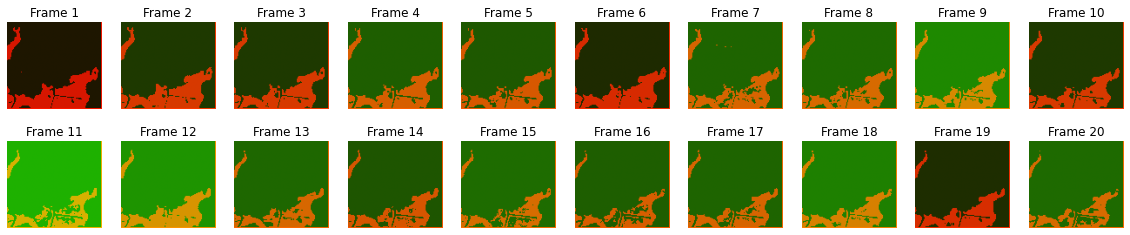

In [81]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

## Model Construction

To build a Convolutional LSTM model, we will use the ConvLSTM2D layer, which will accept inputs of shape (batch_size, num_frames, width, height, channels), and return a prediction movie of the same shape.

In [82]:
x_train.shape[1:]

(45, 100, 109, 3)

In [83]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=64,
    #data_format='channels_last',
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    data_format='channels_last',
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=64,
    data_format='channels_last',
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=3, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [85]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, 100, 109, 3 0         
_________________________________________________________________
conv_lst_m2d_6 (ConvLSTM2D)  (None, None, 100, 109, 64 429056    
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 100, 109, 64 256       
_________________________________________________________________
conv_lst_m2d_7 (ConvLSTM2D)  (None, None, 100, 109, 64 295168    
_________________________________________________________________
batch_normalization_5 (Batch (None, None, 100, 109, 64 256       
_________________________________________________________________
conv_lst_m2d_8 (ConvLSTM2D)  (None, None, 100, 109, 64 33024     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, None, 100, 109, 3) 5187

In [86]:
import pydot
import graphviz

tf.keras.utils.plot_model(model)

InvocationException: GraphViz's executables not found

## Model Training

With our model and data constructed, we can now train the model.

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 5 # orig. val=20
batch_size = 5

# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
)

Train on 40 samples, validate on 10 samples
Epoch 1/5


# Save the trained model

In [44]:
model.save('mymodel101')

## Frame Prediction Visualizations

With our model now constructed and trained, we can generate some example frame predictions based on a new video.

We'll pick a random example from the validation set and then choose the first 10 frames from them. From there, we can allow the model to predict 10 new frames, which we can compare to the ground truth frame predictions.

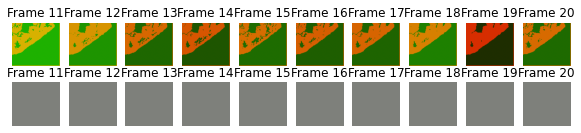

In [45]:
# Select a random example from the validation dataset.
example = val_dataset[np.random.choice(range(len(val_dataset)), size=1)[0]]

# Pick the first/last ten frames from the example.
frames = example[:10, ...]
original_frames = example[10:, ...]

# Predict a new set of 10 frames.
for _ in range(10):
    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 10, figsize=(10, 2))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    #ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[10:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx]), cmap="gray")
    #ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Display the figure.
plt.show()

## Predicted Videos

Finally, we'll pick a few examples from the validation set and construct some GIFs with them to see the model's predicted videos.

You can use the trained model hosted on Hugging Face Hub (https://huggingface.co/keras-io/conv-lstm) and try the demo on Hugging Face Spaces (https://huggingface.co/spaces/keras-io/conv-lstm).

In [ ]:
# Select a few random examples from the dataset.
examples = val_dataset[np.random.choice(range(len(val_dataset)), size=5)]

# Iterate over the examples and predict the frames.
predicted_videos = []
for example in examples:
    # Pick the first/last ten frames from the example.
    frames = example[:10, ...]
    original_frames = example[10:, ...]
    new_predictions = np.zeros(shape=(10, *frames[0].shape))

    # Predict a new set of 10 frames.
    for i in range(3):
        # Extract the model's prediction and post-process it.
        frames = example[: 10 + i + 1, ...]
        new_prediction = model.predict(np.expand_dims(frames, axis=0))
        new_prediction = np.squeeze(new_prediction, axis=0)
        predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

        # Extend the set of prediction frames.
        new_predictions[i] = predicted_frame

    # Create and save GIFs for each of the ground truth/prediction images.
    for frame_set in [original_frames, new_predictions]:
        # Construct a GIF from the selected video frames.
        current_frames = np.squeeze(frame_set)
        current_frames = current_frames[..., np.newaxis] * np.ones(3)
        current_frames = (current_frames * 255).astype(np.uint8)
        current_frames = list(current_frames)

        # Construct a GIF from the frames.
        with io.BytesIO() as gif:
            imageio.mimsave(gif, current_frames, "GIF", fps=5)
            predicted_videos.append(gif.getvalue())

# Display the videos.
print(" Truth\tPrediction")
for i in range(0, len(predicted_videos), 2):
    # Construct and display an `HBox` with the ground truth and prediction.
    box = HBox(
        [
            widgets.Image(value=predicted_videos[i]),
            widgets.Image(value=predicted_videos[i + 1]),
        ]
    )
    display(box)

In [ ]:
# imports Pil module
import PIL.Image
 
# creating image object which is of specific color
im1 = PIL.Image.new(mode = "L", size = (100, 109),color = 153)
#print(im1.shape)
im1 = np.array(im1).reshape(100,109,1)


im2 = PIL.Image.new(mode = "L", size = (100, 109),color = 50)
#print(im2.shape)
im2 = np.array(im2).reshape(100,109,1)

# Merged image
merge_image = np.concatenate((im1, im1), axis=2)

# this will show image in any image viewer
print(merge_image.shape)

In [ ]:
import numpy as np

# Create grayscale image A (The shape as you describe)
greyA = np.random.randint(0, high=256, size=(100, 109, 1))
# Create grayscale image B (The shape as you describe)
greyB = np.random.randint(0, high=256, size=(100, 109, 1))

# Confirm the shape of the grayscale image A
print(greyA.shape)  # (256, 256, 1)
# Confirm the shape of the grayscale image B
print(greyB.shape)  # (256, 256, 1)

# Merged image
merge_image = np.concatenate((greyA, greyB), axis=2)
# Confirm the shape of the Merged image
print(merge_image.shape)  # (256, 256, 2)


# Check these sources/materials:

Source: https://github.com/JayC1208/ConvLSTM2D_example/blob/main/convlstm_example_enterprise_network.ipynb

Source: https://www.kaggle.com/code/kcostya/convlstm-convolutional-lstm-network-tutorial/notebook

# NOAA: Tidal Data

Source: https://tidesandcurrents.noaa.gov/tidetables/2008/ectt2008book.pdf

Date: starting 2008 until 2020